In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.metrics import classification_report, mean_squared_error, confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE # решает проблему дисбаланса классов

from sklearn.linear_model import LogisticRegression

In [41]:
df = pd.read_csv('data/loan.csv', sep='\t')
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [43]:
df.describe(include='all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001002,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


# Обзор фич

In [44]:
df.Loan_ID.value_counts()

Loan_ID
LP001002    1
LP002328    1
LP002305    1
LP002308    1
LP002314    1
           ..
LP001692    1
LP001693    1
LP001698    1
LP001699    1
LP002990    1
Name: count, Length: 614, dtype: int64

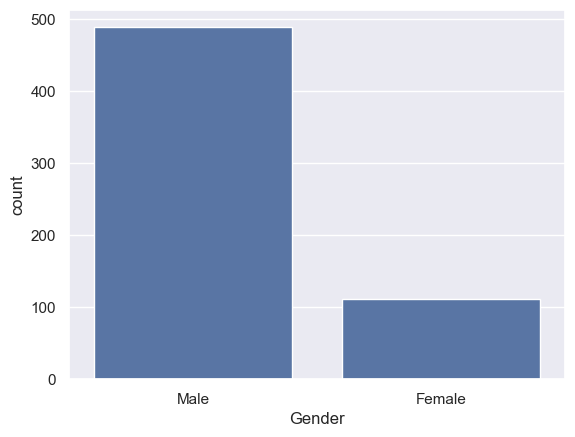

In [45]:
sns.countplot(x="Gender", data=df)
plt.show()

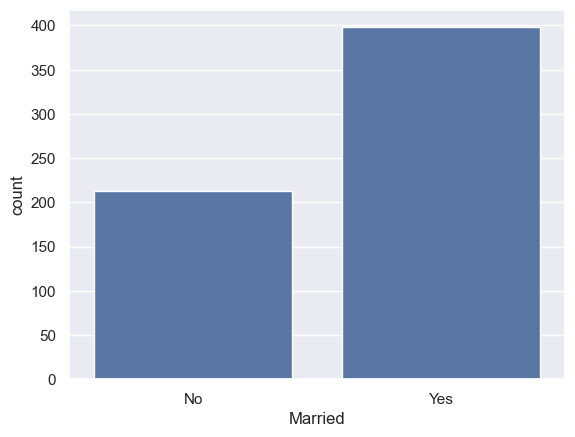

In [46]:
sns.countplot(x="Married", data=df)
plt.show()

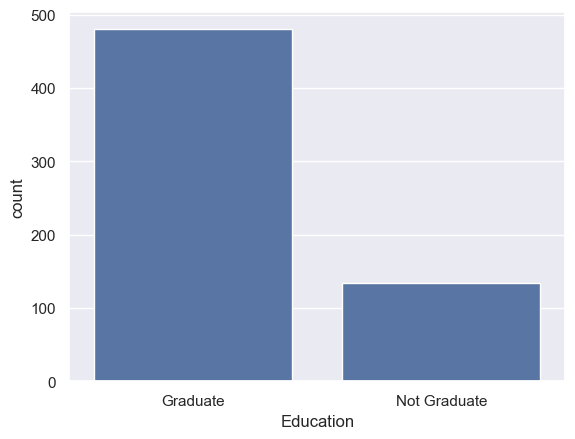

In [47]:
sns.countplot(x="Education", data=df)
plt.show()

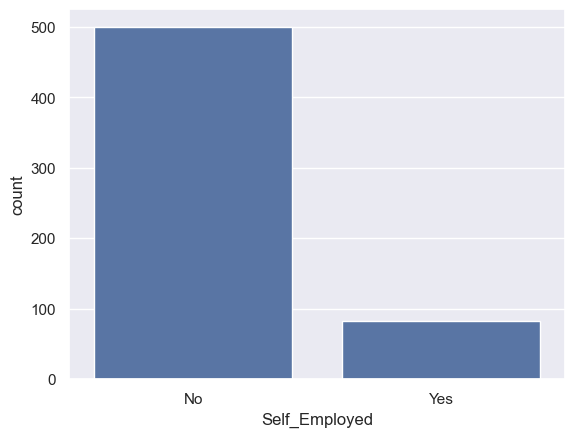

In [48]:
sns.countplot(x="Self_Employed", data=df)
plt.show()

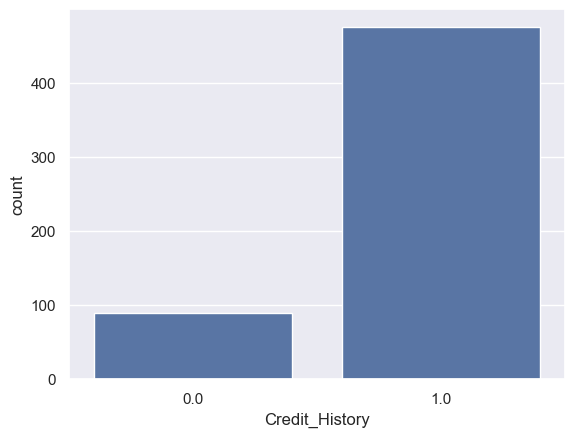

In [49]:
sns.countplot(x="Credit_History", data=df)
plt.show()

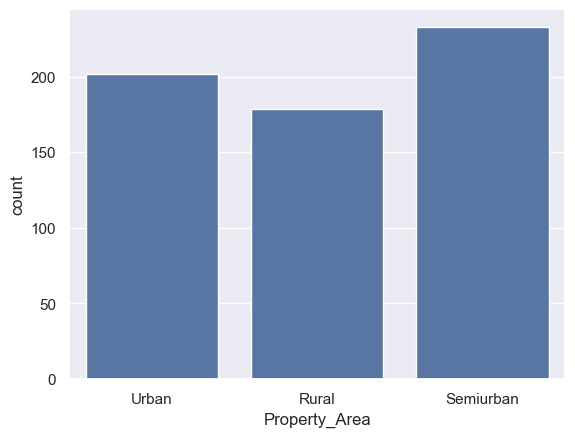

In [50]:
sns.countplot(x="Property_Area", data=df)
plt.show()

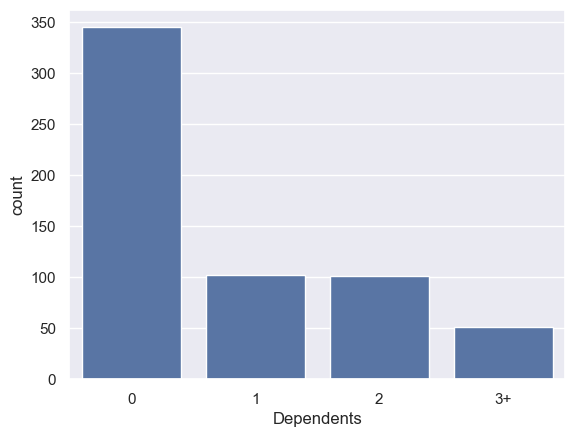

In [51]:
sns.countplot(x="Dependents", data=df)
plt.show()

### Целевая переменная

Вот тут дисбаланс может сыграть злую шутку - модель довольно быстро смекнет мол давай в 60% случаев ДА и будет все ок

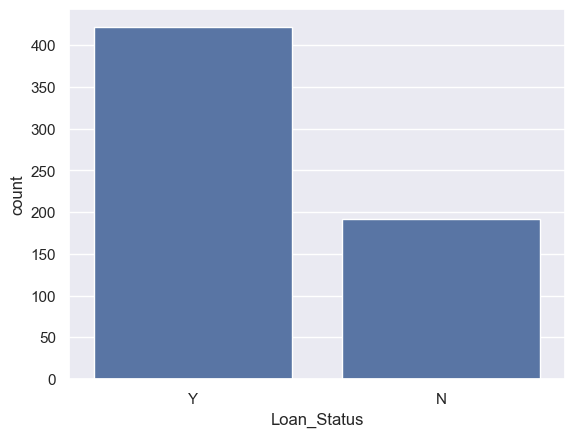

In [52]:
sns.countplot(x="Loan_Status", data=df)
plt.show()

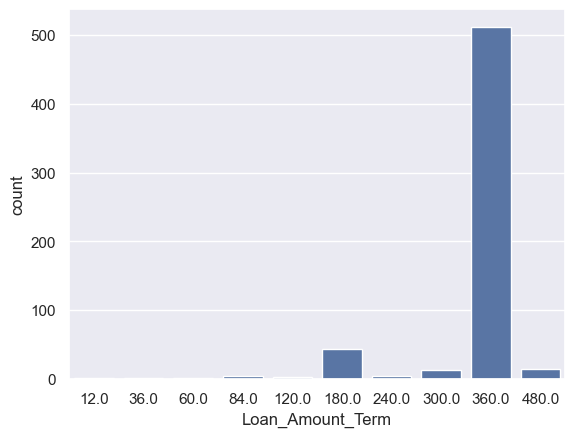

In [53]:
sns.countplot(x="Loan_Amount_Term", data=df)
plt.show()

In [54]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


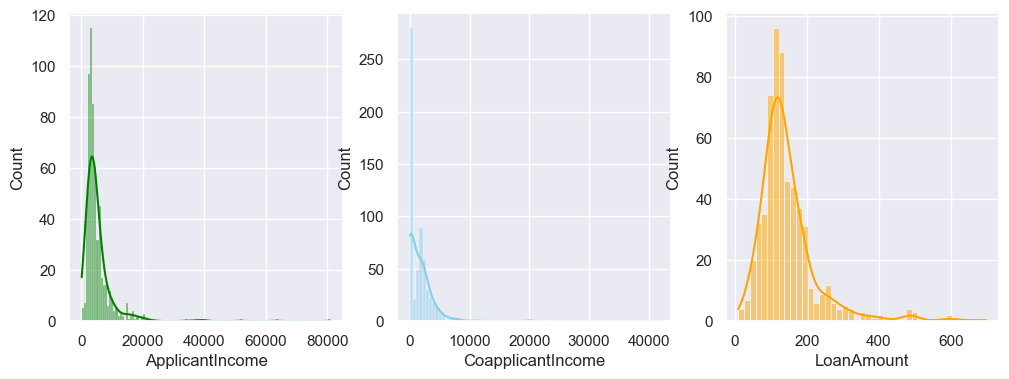

In [55]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=df, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=df, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=df, x="LoanAmount", kde=True, ax=axs[2], color='orange');

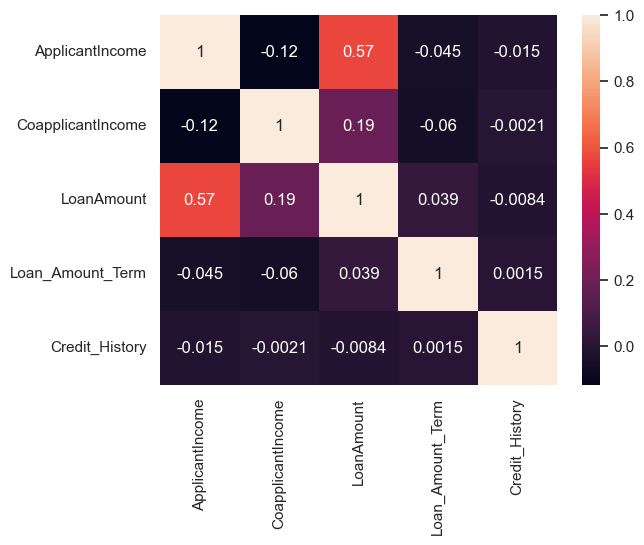

In [56]:
sns.heatmap(df.corr(numeric_only=True), annot=True);

# Собираем датасет

In [57]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [58]:
df = df.drop(['Loan_ID'], axis = 1)

In [59]:
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)
# Нужно быть предельно осторожным ибо несет большую долю информации скорее всего и может привести к ошибке, лучше не пытаться угадать это поле
df['Credit_History'].fillna(df['Credit_History'].mode()[0],inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0],inplace=True)

In [60]:
df['LoanAmount'].fillna(df['LoanAmount'].median(), inplace=True)

In [61]:
df = pd.get_dummies(df) # минус в том что образуются ненужные поля (например пол)
df

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Female,Gender_Male,Married_No,Married_Yes,Dependents_0,...,Dependents_3+,Education_Graduate,Education_Not Graduate,Self_Employed_No,Self_Employed_Yes,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,128.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
1,4583,1508.0,128.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,True,False,False,True,False
2,3000,0.0,66.0,360.0,1.0,False,True,False,True,True,...,False,True,False,False,True,False,False,True,False,True
3,2583,2358.0,120.0,360.0,1.0,False,True,False,True,True,...,False,False,True,True,False,False,False,True,False,True
4,6000,0.0,141.0,360.0,1.0,False,True,True,False,True,...,False,True,False,True,False,False,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,True,False,True,False,True,...,False,True,False,True,False,True,False,False,False,True
610,4106,0.0,40.0,180.0,1.0,False,True,False,True,False,...,True,True,False,True,False,True,False,False,False,True
611,8072,240.0,253.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True
612,7583,0.0,187.0,360.0,1.0,False,True,False,True,False,...,False,True,False,True,False,False,False,True,False,True


In [62]:
df = df.drop(['Gender_Female', 'Married_No', 'Education_Not Graduate', 
              'Self_Employed_No', 'Loan_Status_N'], axis = 1)

new = {'Gender_Male': 'Gender', 
       'Married_Yes': 'Married', 
       'Education_Graduate': 'Education', 
       'Self_Employed_Yes': 'Self_Employed',
       'Loan_Status_Y': 'Loan_Status'}
       
df.rename(columns=new, inplace=True)

In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ApplicantIncome          614 non-null    int64  
 1   CoapplicantIncome        614 non-null    float64
 2   LoanAmount               614 non-null    float64
 3   Loan_Amount_Term         614 non-null    float64
 4   Credit_History           614 non-null    float64
 5   Gender                   614 non-null    bool   
 6   Married                  614 non-null    bool   
 7   Dependents_0             614 non-null    bool   
 8   Dependents_1             614 non-null    bool   
 9   Dependents_2             614 non-null    bool   
 10  Dependents_3+            614 non-null    bool   
 11  Education                614 non-null    bool   
 12  Self_Employed            614 non-null    bool   
 13  Property_Area_Rural      614 non-null    bool   
 14  Property_Area_Semiurban  6

In [64]:
X = df.drop(["Loan_Status"], axis=1)
y = df["Loan_Status"]

In [65]:
# Создает полностью синтетические новые значения
X, y = SMOTE().fit_resample(X, y)

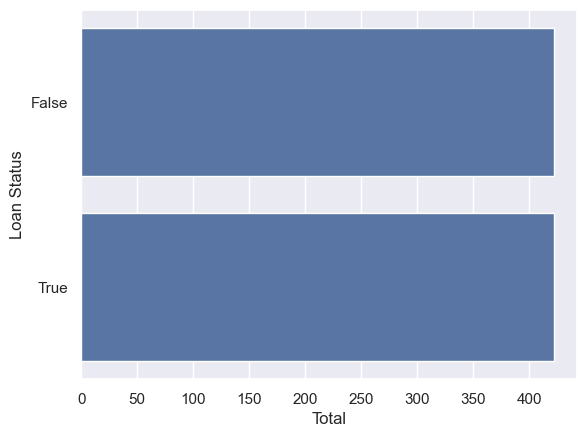

In [66]:
sns.countplot(y=y, data=X)
plt.ylabel('Loan Status')
plt.xlabel('Total')
plt.show()

## Дорабатываем датасет

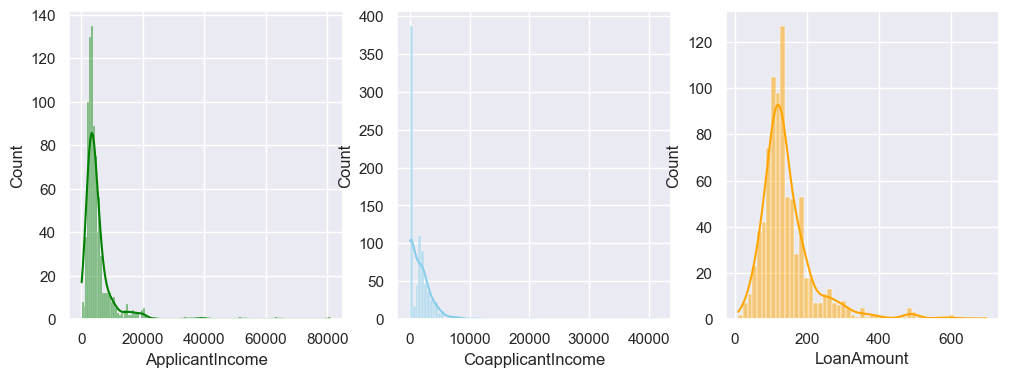

In [67]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=X, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=X, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=X, x="LoanAmount", kde=True, ax=axs[2], color='orange');

In [68]:
# Приводим к более нормальному распределению
X.ApplicantIncome = np.log(X.ApplicantIncome) #  Хорошо справляется со смещением влево
# НО!!! ЛОгарифм не определен в нуле, из=за чего будут наны в ДС, что очень плохо
X.CoapplicantIncome = np.sqrt(X.CoapplicantIncome) # Более мягкий вариант
X.LoanAmount = np.log(X.LoanAmount)

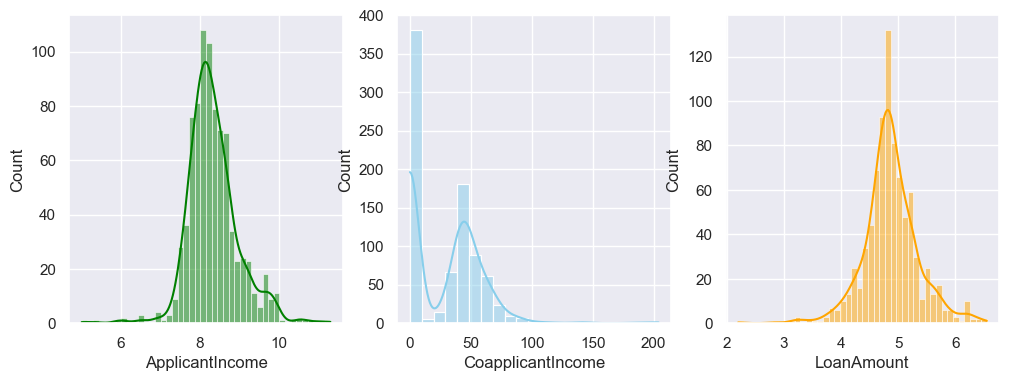

In [69]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

sns.histplot(data=X, x="ApplicantIncome", kde=True, ax=axs[0], color='green')
sns.histplot(data=X, x="CoapplicantIncome", kde=True, ax=axs[1], color='skyblue')
sns.histplot(data=X, x="LoanAmount", kde=True, ax=axs[2], color='orange');

In [70]:
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# indexes = ((X < (Q1 - 1.5 * IQR)) |(X > (Q3 + 1.5 * IQR))).any(axis=1)

# y = y[~indexes]
# X = X[~indexes]

# X = X[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
# y = y[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [72]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Логистическая регрессия

In [73]:
model = LogisticRegression(max_iter=500, random_state=0, verbose=1)
model.fit(X_train, y_train)

LogisticRegression(max_iter=500, random_state=0, verbose=1)

In [74]:
y_pred = model.predict(X_test)

In [75]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.63      0.76        86
        True       0.72      0.98      0.83        83

    accuracy                           0.80       169
   macro avg       0.84      0.80      0.79       169
weighted avg       0.84      0.80      0.79       169



micro average == micro accuracy
10 примеров
1 - 0   --- 0 правильно
9 - 1   --- 9 правильно
(9) / (10) = 0.9 90%

macro average, macro accuracy - для того чтобы корректно рассчитать стоимость при разности классов
10 примеров
1 - 0   --- 0 правильно
9 - 1   --- 9 правильно
(0 + 1)/2 = 0.5 50%

<Axes: >

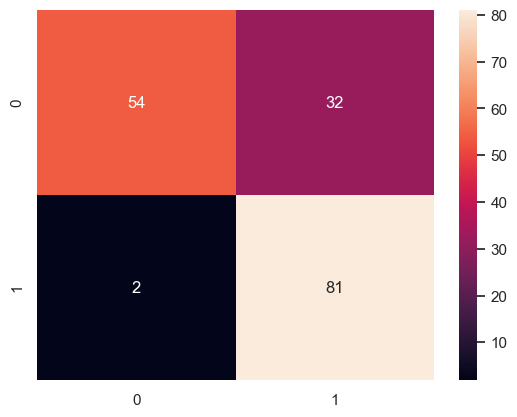

In [77]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True)